# 논문내용 정리
이라크, 티크리트, 티크리트대학교, 이과대학 물리학과  
태양광 패널 효율에 영향을 미치는 기상 조건 논문  
  
단결정 실리콘의 태양 전지가 사용  
이론적인 효율은 약(16.276%)  
실효율은 날씨가 흐리고 표면이 빗물에 젖었을 때 최대효율(8.5258%)  
동일한 조건에서 표면이 건조할 때 최대 효율은 (14.5703%)  
대기가 깨끗하고 표면이 먼지로 덮여 있을 때 최대 효율은 (8.9502%)  
효율 수치 비교는 못하니 전제로 깔고 가자  
  
그림3 일사량 시간별 발전량 추세선  
젖은 상태에서 태양 전지판 표면의 효율 및 전력의 가장 큰 값을 발견했습니다.(가장 높은 효율)  
흐린날씨 건조한 패널 (가장 높은 발전량)  
깨끗한 패널, 먼지 묻은 패널 (가장 큰 발전량 차이)  
  
표면이 젖으면 건조했을 때보다 효율이 떨어지는데 물방울이 태양 복사열 산란시키기 때문입니다.

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [118]:
df_raw = pd.read_csv('./용원님/기상발전_최종본.csv', encoding='euc-kr')

In [119]:
df_raw

,지역,일시,발전량,년,월,계절,평균 기온,최저 기온,최저 기온 시각,최고 기온,...,최고 해면 기압,최고 해면기압 시각,최저 해면기압,최저 해면기압 시각,평균 해면기압,가조시간,합계 일조 시간,평균 지면온도,최저 초상온도,일강수량
0,강원도,2017-01-01,154918.180,2017,1,겨울,6.0,1.5,639.0,9.8,...,1027.2,1007.0,1020.8,2354.0,1024.4,9.6,8.4,2.2,-2.7,0.0
1,강원도,2017-01-01,154918.180,2017,1,겨울,0.5,-3.9,844.0,5.5,...,1032.2,1007.0,1025.4,2346.0,1028.8,9.6,2.0,-0.5,-8.4,0.0
2,강원도,2017-01-01,154918.180,2017,1,겨울,-0.4,-5.5,507.0,5.8,...,1032.1,1004.0,1025.3,2353.0,1028.8,9.6,3.5,-0.2,-8.3,0.0
3,강원도,2017-01-01,154918.180,2017,1,겨울,0.2,-4.6,821.0,5.9,...,1029.8,213.0,1024.3,1442.0,1026.8,9.7,6.8,-1.8,-9.0,0.0
4,강원도,2017-01-01,154918.180,2017,1,겨울,-0.2,-6.2,735.0,6.1,...,1031.6,932.0,1024.7,2333.0,1028.2,9.6,4.9,-0.2,-10.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.1,-8.6,744.0,-0.8,...,1033.5,2350.0,1028.8,13.0,1031.8,9.7,7.8,-1.3,-11.7,0.0
173531,충청북도,2021-12-31,836706.701,2021,12,겨울,-6.4,-11.4,2320.0,-1.9,...,1033.1,2327.0,1027.5,1.0,1030.9,9.7,7.9,-2.9,-14.2,0.0
173532,충청북도,2021-12-31,836706.701,2021,12,겨울,-4.6,-6.2,2340.0,-0.9,...,1033.2,1006.0,1028.6,1.0,1031.7,9.7,8.6,-1.3,-12.2,0.0
173533,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.0,-8.3,605.0,0.5,...,1033.8,2349.0,1029.2,1.0,1032.1,9.7,8.7,-2.0,-13.5,0.0


In [122]:
df_raw.columns

Index(['지역', '일시', '발전량', '년', '월', '계절', '평균 기온', '최저 기온', '최저 기온 시각',
       '최고 기온', '최고 기온 시각', '최대 순간풍속', '최대 순간 풍속 풍향', '최대 순간풍속 시각', '최대 풍속',
       '최대 풍속 풍향', '최대 풍속 시각', '평균 풍속', '풍정합', '최다 풍향', '평균 이슬점온도', '최소 상대습도',
       '평균 상대습도 시각', '평균 상대습도', '평균 증기압', '평균 현지기압', '최고 해면 기압', '최고 해면기압 시각',
       '최저 해면기압', '최저 해면기압 시각', '평균 해면기압', '가조시간', '합계 일조 시간', '평균 지면온도',
       '최저 초상온도', '일강수량'],
      dtype='object')

In [121]:
df = df_raw[['지역', '일시', '발전량', '년', '월', '계절', '평균 기온', '평균 이슬점온도', '평균 상대습도', '가조시간', '합계 일조 시간', '일강수량', '평균 풍속']]
df

,지역,일시,발전량,년,월,계절,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속
0,강원도,2017-01-01,154918.180,2017,1,겨울,6.0,-3.8,50.0,9.6,8.4,0.0,1.7
1,강원도,2017-01-01,154918.180,2017,1,겨울,0.5,-1.9,85.0,9.6,2.0,0.0,0.3
2,강원도,2017-01-01,154918.180,2017,1,겨울,-0.4,-2.3,87.1,9.6,3.5,0.0,0.4
3,강원도,2017-01-01,154918.180,2017,1,겨울,0.2,-6.2,63.6,9.7,6.8,0.0,1.3
4,강원도,2017-01-01,154918.180,2017,1,겨울,-0.2,-2.7,83.8,9.6,4.9,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.1,-13.8,51.1,9.7,7.8,0.0,1.5
173531,충청북도,2021-12-31,836706.701,2021,12,겨울,-6.4,-18.7,38.4,9.7,7.9,0.0,2.4
173532,충청북도,2021-12-31,836706.701,2021,12,겨울,-4.6,-16.6,38.8,9.7,8.6,0.0,1.8
173533,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.0,-13.8,51.6,9.7,8.7,0.0,2.3


In [132]:
df.groupby(['지역', '일시']).mean()

발전량       년     월     평균 기온   평균 이슬점온도    평균 상대습도  \
지역   일시                                                                     
강원도  2017-01-01  154918.180  2017.0   1.0  1.942857  -3.392857  70.821429   
     2017-01-02  104640.902  2017.0   1.0  4.235714  -1.000000  71.207143   
     2017-01-03  258526.982  2017.0   1.0  2.314286  -6.342857  58.150000   
     2017-01-04  259588.645  2017.0   1.0  2.657143  -4.421429  62.942857   
     2017-01-05  109151.179  2017.0   1.0  1.578571  -2.092857  78.457143   
...                     ...     ...   ...       ...        ...        ...   
충청북도 2021-12-27  612336.293  2021.0  12.0 -5.733333 -11.675000  64.841667   
     2021-12-28  260067.376  2021.0  12.0 -1.483333  -4.266667  82.183333   
     2021-12-29  281289.137  2021.0  12.0  1.625000  -3.300000  71.508333   
     2021-12-30  661147.861  2021.0  12.0 -1.883333  -9.341667  59.133333   
     2021-12-31  836706.701  2021.0  12.0 -5.425000 -14.808333  49.283333   

                     가조시간  합계 일조 시간      일강수량     평균 풍속  
지역   일시                                                  
강원도  2017-01-01  9.621429  5.064286  0.000000  1.478571  
     2017-01-02  9.635714  4.157143  0.028571  2.000000  
     2017-01-03  9.635714  7.392857  0.000000  1.814286  
     2017-01-04  9.664286  7.692857  0.000000  1.414286  
     2017-01-05  9.678571  0.892857  4.392857  1.464286  
...                   ...       ...       ...       ...  
충청북도 2021-12-27  9.683333  5.491667  0.250000  1.366667  
     2021-12-28  9.691667  0.600000  0.000000  0.641667  
     2021-12-29  9.691667  1.783333  0.033333  1.500000  
     2021-12-30  9.708333  5.566667  0.825000  2.516667  
     2021-12-31  9.700000  8.575000  0.000000  2.158333  

[20086 rows x 10 columns]

In [ ]:
'''
봄: 3,4,5
여름: 6,7,8
가을: 9,10,11
겨울: 12,1,2
'''

In [136]:
df_group = df.groupby(['지역', '일시']).mean()
df_group = df_group.reset_index()
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속
0,강원도,2017-01-01,154918.180,2017.0,1.0,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571
1,강원도,2017-01-02,104640.902,2017.0,1.0,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000
2,강원도,2017-01-03,258526.982,2017.0,1.0,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286
3,강원도,2017-01-04,259588.645,2017.0,1.0,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286
4,강원도,2017-01-05,109151.179,2017.0,1.0,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286
...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021.0,12.0,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667
20082,충청북도,2021-12-28,260067.376,2021.0,12.0,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667
20083,충청북도,2021-12-29,281289.137,2021.0,12.0,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000
20084,충청북도,2021-12-30,661147.861,2021.0,12.0,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667


In [ ]:
tmp = []
for i in df_group['월']:
    if 3.0 <= i and i <= 5.0:
        tmp.append('봄')
    elif 6.0 <= i and i <= 8.0:
        tmp.append('여름')
    elif 9.0 <= i and i <= 11.0:
        tmp.append('가을')
    elif 1.0 <= i and i <= 2.0 or i==12.0:
        tmp.append('겨울')

In [154]:
df_group['계절'] = tmp

In [168]:
df_group['월'] = df_group['월'].astype('int')

In [169]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절
0,강원도,2017-01-01,154918.180,2017.0,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울
1,강원도,2017-01-02,104640.902,2017.0,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울
2,강원도,2017-01-03,258526.982,2017.0,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울
3,강원도,2017-01-04,259588.645,2017.0,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울
4,강원도,2017-01-05,109151.179,2017.0,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021.0,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울
20082,충청북도,2021-12-28,260067.376,2021.0,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울
20083,충청북도,2021-12-29,281289.137,2021.0,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울
20084,충청북도,2021-12-30,661147.861,2021.0,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울


실효율은 날씨가 흐리고 표면이 빗물에 젖었을 때 최대효율(8.5258%)  
동일한 조건에서 표면이 건조할 때 최대 효율은 (14.5703%)  
1.7배 차이

In [170]:
df_rain = df_group[df_group['일강수량'] != 0.0]
df_not_rain = df_group[df_group['일강수량'] == 0.0]

In [171]:
df_rain = df_rain.reset_index(drop=True)
df_not_rain = df_not_rain.reset_index(drop=True)

In [172]:
df_rain.describe()

,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속
count,8.725000e+03,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000
mean,8.121097e+05,2019.059484,6.673009,14.884940,10.349426,76.761678,12.454463,4.018126,8.156110,2.220454
std,1.015436e+06,1.435138,3.235310,9.594842,11.088482,12.920074,1.711830,3.364575,16.499209,1.175062
min,1.060051e+03,2017.000000,1.000000,-14.460000,-25.628571,24.026667,9.560000,0.000000,0.006250,0.400000
25%,1.917106e+05,2018.000000,4.000000,6.950000,1.775000,68.950000,10.800000,0.675000,0.220000,1.400000
50%,5.065228e+05,2019.000000,7.000000,17.287500,12.853333,78.840000,12.800000,3.550000,1.533333,1.906250
75%,1.049150e+06,2020.000000,9.000000,22.985714,19.960000,86.540000,14.093750,6.900000,8.028571,2.735714
max,9.959270e+06,2021.000000,12.000000,31.700000,27.800000,99.760000,14.800000,12.950000,215.930000,12.825000


<AxesSubplot:xlabel='지역', ylabel='일강수량'>

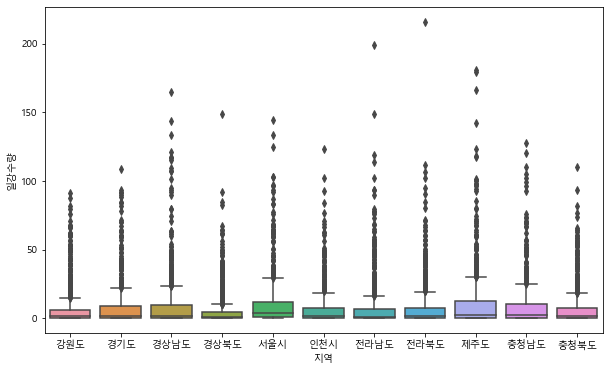

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(x='지역', y='일강수량', data=df_rain)

<AxesSubplot:xlabel='지역', ylabel='일강수량'>

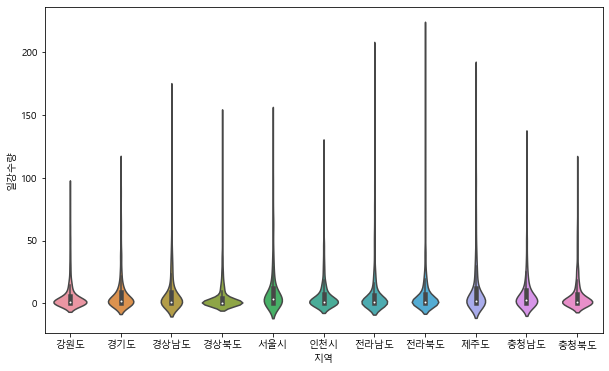

In [174]:
plt.figure(figsize=(10,6))
sns.violinplot(x='지역', y='일강수량', data=df_rain)

In [175]:
# 비가 내린날 일별 평균 발전량
# 비가 내린날 전체 발전량 / 전체 날짜수
df_rain['발전량'].sum() / len(df_rain)

812109.6797052148

In [176]:
# 비가 안 내린날 일별 평균 발전량
# 비가 안 내린날 전체 발전량 / 전체 날짜수
df_not_rain['발전량'].sum() / len(df_not_rain)

1108951.330806619

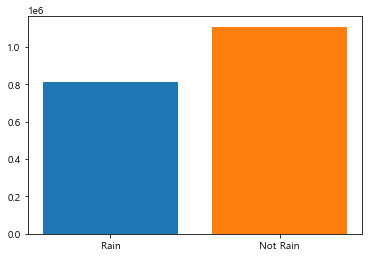

In [177]:
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))
plt.show()

In [178]:
(df_rain['발전량'].sum() / len(df_rain)) / (df_not_rain['발전량'].sum() / len(df_not_rain))

0.7323222012949024

건조한 날?  
계절, 평균 풍속, 평균 기온, 일조 시간

계절

In [179]:
df_rain_season = df_rain.groupby('계절')[['발전량']].mean()
df_not_rain_season = df_not_rain.groupby('계절')[['발전량']].mean()

In [180]:
df_rain_season = df_rain_season.reset_index()
df_not_rain_season = df_not_rain_season.reset_index()
df_rain_season['비'] = 1
df_not_rain_season['비'] = 0
df_season = pd.concat([df_rain_season, df_not_rain_season], ignore_index=True)
df_season

,계절,발전량,비
0,가을,7.613313e+05,1
1,겨울,6.628769e+05,1
2,봄,8.341766e+05,1
3,여름,9.280747e+05,1
4,가을,1.074421e+06,0
5,겨울,8.056303e+05,0
6,봄,1.334879e+06,0
7,여름,1.258994e+06,0


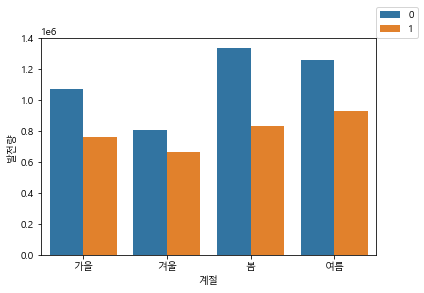

In [181]:
sns.barplot(x='계절', y='발전량', hue='비', data=df_season)
plt.legend(loc=(1.0, 1.0))
plt.show()

평균 풍속

In [183]:
df_rain.head()

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절
0,강원도,2017-01-02,104640.902,2017.0,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울
1,강원도,2017-01-05,109151.179,2017.0,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울
2,강원도,2017-01-06,277486.341,2017.0,1,2.857143,-1.342857,76.107143,9.685714,7.221429,0.207143,0.978571,겨울
3,강원도,2017-01-07,229365.225,2017.0,1,2.400000,-2.107143,74.600000,9.707143,6.792857,0.035714,1.000000,겨울
4,강원도,2017-01-08,184832.572,2017.0,1,4.914286,1.350000,79.485714,9.714286,2.300000,1.478571,1.278571,겨울


In [184]:
df_rain.describe()

,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속
count,8.725000e+03,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000
mean,8.121097e+05,2019.059484,6.673009,14.884940,10.349426,76.761678,12.454463,4.018126,8.156110,2.220454
std,1.015436e+06,1.435138,3.235310,9.594842,11.088482,12.920074,1.711830,3.364575,16.499209,1.175062
min,1.060051e+03,2017.000000,1.000000,-14.460000,-25.628571,24.026667,9.560000,0.000000,0.006250,0.400000
25%,1.917106e+05,2018.000000,4.000000,6.950000,1.775000,68.950000,10.800000,0.675000,0.220000,1.400000
50%,5.065228e+05,2019.000000,7.000000,17.287500,12.853333,78.840000,12.800000,3.550000,1.533333,1.906250
75%,1.049150e+06,2020.000000,9.000000,22.985714,19.960000,86.540000,14.093750,6.900000,8.028571,2.735714
max,9.959270e+06,2021.000000,12.000000,31.700000,27.800000,99.760000,14.800000,12.950000,215.930000,12.825000


In [185]:
df_not_rain.describe()

,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속
count,1.136100e+04,11361.000000,11361.000000,11361.000000,11361.000000,11361.000000,11361.000000,11361.00000,11361.0,11361.000000
mean,1.108951e+06,2018.955286,6.408767,12.070118,4.444913,63.526908,11.997684,8.29988,0.0,1.978976
std,1.293577e+06,1.396023,3.599805,9.484146,10.831476,13.052080,1.676764,2.82109,0.0,0.967100
min,5.285698e+03,2017.000000,1.000000,-15.120000,-28.171429,17.900000,9.560000,0.00000,0.0,0.450000
25%,2.970703e+05,2018.000000,3.000000,4.635714,-3.357143,54.300000,10.440000,6.93000,0.0,1.300000
50%,7.562012e+05,2019.000000,6.000000,12.030000,4.000000,64.425000,11.808333,8.72000,0.0,1.742857
75%,1.381476e+06,2020.000000,10.000000,19.966667,13.170000,73.590000,13.600000,10.28000,0.0,2.433333
max,1.015185e+07,2021.000000,12.000000,33.700000,27.650000,96.650000,14.800000,13.75000,0.0,8.650000


<AxesSubplot:xlabel='지역', ylabel='평균 풍속'>

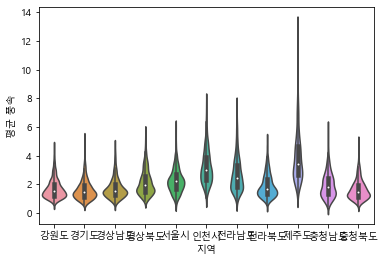

In [186]:
sns.violinplot(x='지역', y='평균 풍속', data=df_rain)

<AxesSubplot:xlabel='지역', ylabel='평균 풍속'>

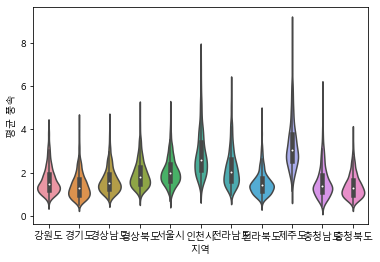

In [187]:
sns.violinplot(x='지역', y='평균 풍속', data=df_not_rain)

기상청  
산불 발생 위험: 실효습도 50%  
건조 주의보: 실효습도 35% 이하 2일 이상 계속  
건조 경보: 실효습도 25% 이하 2일 이상 계속  

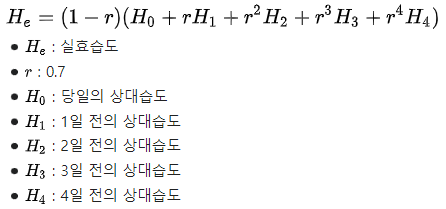

In [417]:
df_group = pd.read_csv('./df_group.csv', encoding='euc-kr')

In [418]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울


In [268]:
# df_group['일시'] = pd.to_datetime(df_group['일시'])

In [259]:
#today = date.today()
today = df_group['일시'][0]

#print(type(today))
#print(type(df_group['일시'][0]))
yesterday = today - timedelta(1)
 
print(today.strftime('%Y-%m-%d'))
print(yesterday.strftime('%Y-%m-%d'))

2017-01-01
2016-12-31


In [420]:
df_group['지역'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '서울시', '인천시', '전라남도', '전라북도', '제주도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
area = ['강원도', '경기도', '경상남도', '경상북도', '서울시', '인천시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도']

In [453]:
df_2016 = pd.read_csv('./df_2016상대습도.csv', encoding='euc-kr')

In [382]:
# df_2016['일시'] = pd.to_datetime(df_2016['일시'])

In [454]:
df_2016

,지역,일시,지점번호,평균 상대습도
0,강원도,2016-12-28,134.642857,65.292857
1,강원도,2016-12-29,134.642857,49.692857
2,강원도,2016-12-30,134.642857,54.292857
3,강원도,2016-12-31,134.642857,64.207143
4,경기도,2016-12-28,144.200000,55.320000
5,경기도,2016-12-29,144.200000,52.320000
6,경기도,2016-12-30,144.200000,60.960000
7,경기도,2016-12-31,144.200000,76.800000
8,경상남도,2016-12-28,240.437500,56.362500
9,경상남도,2016-12-29,240.437500,46.162500


In [465]:
def getAvgRhm(area='', date=''):
#     area = '강원도'
#     date = '2016-12-28'

    # print(df_2016['일시'][0])
    # print(date)
    # print(df_2016['일시'][0] == date)

    con1 = df_2016['지역'] == area
    con2 = df_2016['일시'] == date
    tmp = df_2016[con1 & con2]['평균 상대습도'].values
    return tmp[0]

In [467]:
getAvgRhm('강원도','2016-12-30')

54.29285714285714

In [475]:
df_raw.groupby('지역').mean()['합계 일조 시간'].sort_values(ascending=False)

지역
충청남도    6.802026
서울시     6.704162
인천시     6.692808
경기도     6.590340
경상남도    6.552796
경상북도    6.467298
강원도     6.372176
전라남도    6.306591
충청북도    6.242006
전라북도    6.172107
제주도     5.901917
Name: 합계 일조 시간, dtype: float64

In [476]:
df_raw.groupby('지역').mean()['가조시간'].sort_values(ascending=False)

지역
서울시     12.202136
인천시     12.201442
강원도     12.200763
경기도     12.200088
충청북도    12.198903
충청남도    12.198193
경상북도    12.196097
전라북도    12.193231
경상남도    12.191700
전라남도    12.190463
제주도     12.186720
Name: 가조시간, dtype: float64

In [477]:
df_raw.groupby('지역').mean()['평균 기온'].sort_values(ascending=False)

지역
제주도     16.609748
경상남도    14.365913
전라남도    14.270040
서울시     13.339650
경상북도    13.100153
전라북도    13.095991
충청북도    12.708237
충청남도    12.707640
인천시     12.259365
경기도     12.148927
강원도     11.720721
Name: 평균 기온, dtype: float64